In [273]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [274]:
def normal_pdf(x, mu, sigma):
    fraction = 1/(sigma*np.sqrt(2*np.pi))
    exp_term = -.5 * ((x-mu)/sigma)**2
    return fraction * np.exp(exp_term)

a)

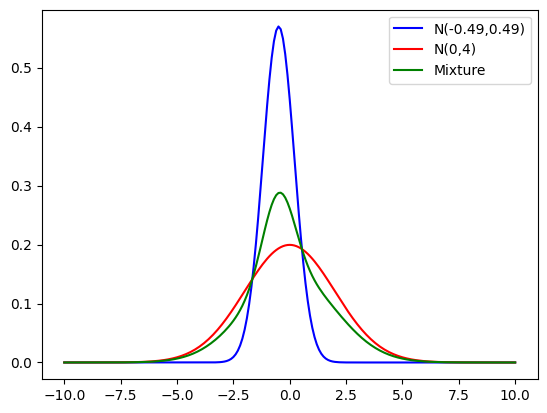

In [275]:
s = pd.Series(np.arange(-10,10.1,0.1))
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
plt.plot(s, s_norm_1, label='N(-0.49,0.49)', color='blue')
plt.plot(s, s_norm_2, label='N(0,4)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
# plt.axvline(x=1, color='r', linestyle='--')
plt.legend()

b) Observando la figura se nota que es asimétrica positiva, ya que tiene una cola izquierda con mayor densidad (se nota entre 1 y 2)

c)

In [276]:
w1 = 0.75
w2 = 0.25
mu1 = 0
mu2 = -0.49
var1 = 4
var2 = 0.49

#Media de la mixtura
mu_mix = w1 * mu1 + w2 * mu2

#Varianza de la mixtura
var_mix = w1 * (var1 + (mu1 - mu_mix) ** 2) + w2 * (var2 + (mu2 - mu_mix) ** 2)
std_mix = np.sqrt(var_mix)

#Tercer momento centrado
mu_3 = (
    w1 * ((mu1 - mu_mix) ** 3 + 3 * (mu1 - mu_mix) * var1)
    + w2 * ((mu2 - mu_mix) ** 3 + 3 * (mu2 - mu_mix) * var2))

#Cuarto momento centrado
mu_4 = (
    w1 * ((mu1 - mu_mix) ** 4 + 6 * (mu1 - mu_mix) ** 2 * var1 + 3 * var1 ** 2)
    + w2 * ((mu2 - mu_mix) ** 4 + 6 * (mu2 - mu_mix) ** 2 * var2 + 3 * var2 ** 2))

# Asimetría y kurtosis total (no en exceso)
skewness = mu_3 / (std_mix ** 3)
kurtosis_total = mu_4 / (var_mix ** 2)

print("Media:", mu_mix)
print("Varianza:", round(var_mix,5))
print("Tercer momento μ₃:", round(mu_3,5))
print("Cuarto momento μ₄:",   round(mu_4,5))
print("Asimetría:", round(skewness,5))
print("Kurtosis:", round(kurtosis_total,5))

Media: -0.1225
Varianza: 3.16752
Tercer momento μ₃: 0.95641
Cuarto momento μ₄: 36.55418
Asimetría: 0.16966
Kurtosis: 3.64333


d) Si, es leptocurtica ya que la kurtosis en exceso es 0.64. 

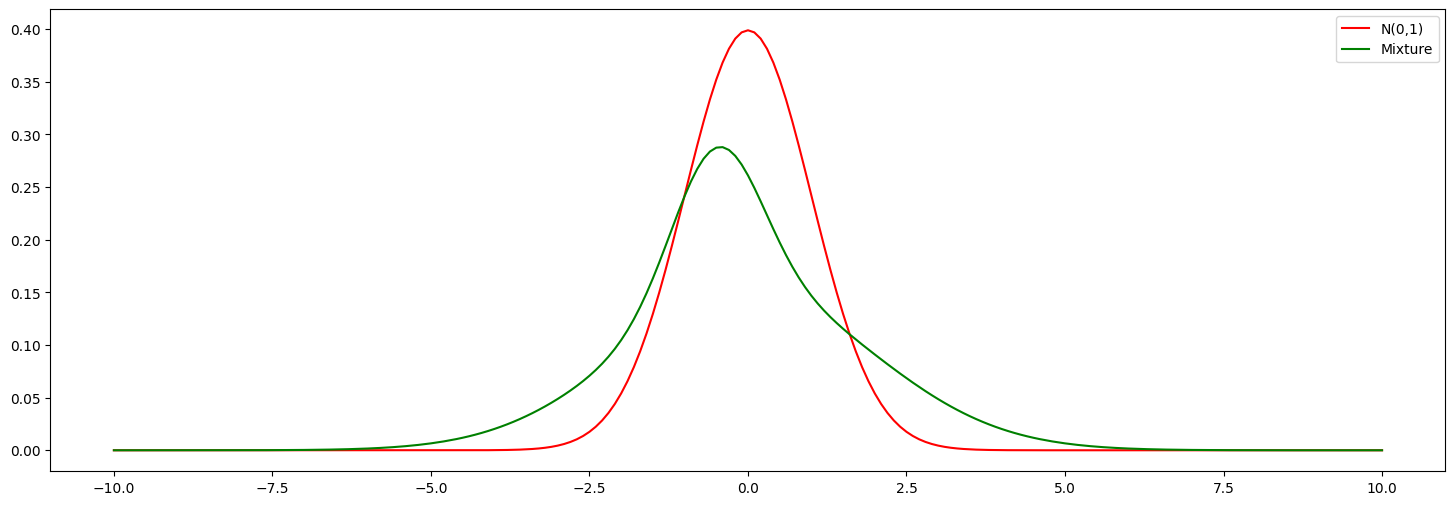

In [277]:
s = pd.Series(np.arange(-10,10.1,0.1))
norm_standar = normal_pdf(s, mu=0, sigma=1)
s_norm_1 = normal_pdf(s, mu=-0.49, sigma=np.sqrt(0.49))
s_norm_2 = normal_pdf(s, mu=0, sigma=np.sqrt(4))
mixtured = 0.25 * s_norm_1 + 0.75 * s_norm_2
plt.figure(figsize=(18, 6))
plt.plot(s, norm_standar, label='N(0,1)', color='red')
plt.plot(s, mixtured, label='Mixture', color='green')
plt.legend()

e) leptocurtica con cola pesada a ambos lados

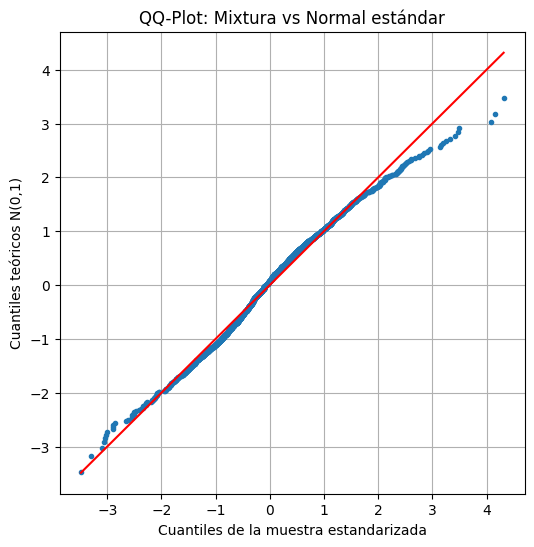

In [278]:
from scipy.stats import norm

# Generar muestra de 2000 valores
# Samplear de la mixtura es lo mismo que samplear de cada una de las normales que la componen pesando por su aporte a la mixtura.
u = np.random.rand(2000)
samples = np.where(u < w1,
                   np.random.normal(mu1, np.sqrt(var1), size=2000),
                   np.random.normal(mu2, np.sqrt(var2), size=2000)
                )

# Estandarizar la muestra
z = (samples - mu_mix) / var_mix**0.5

# Cuantiles teóricos de la normal estándar
probabilidades = (np.arange(1, 2001) - 0.5) / 2000
cuantiles_teoricos = norm.ppf(probabilidades)

# Ordenar la muestra estandarizada
z_ordenado = np.sort(z)

# QQ-Plot (eje horizontal: muestra estandarizada; eje vertical: teóricos)
plt.figure(figsize=(6, 6))
plt.plot(z_ordenado, cuantiles_teoricos, marker='.', linestyle='none')
xmin = min(z_ordenado.min(), cuantiles_teoricos.min())
xmax = max(z_ordenado.max(), cuantiles_teoricos.max())
plt.plot([xmin, xmax], [xmin, xmax], 'r-', label='Línea identidad')
plt.xlabel('Cuantiles de la muestra estandarizada')
plt.ylabel('Cuantiles teóricos N(0,1)')
plt.title('QQ-Plot: Mixtura vs Normal estándar')
plt.grid(True)
plt.show()

# 2)

In [279]:
df = pd.read_stata("MIA103_Final_Ejer_2_250823.dta")
df = df.set_index("t")
df.head()

,RBER_AR,RBER_AR_sd6
t,,
2010-01-01,98.870003,1.225477
2010-02-01,100.620003,1.976474
2010-03-01,99.820000,2.138749
2010-04-01,99.349998,1.786254
2010-05-01,102.059998,1.618118


a)

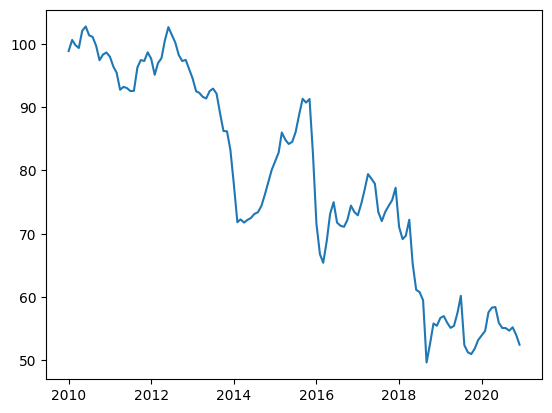

In [280]:
plt.plot(df['RBER_AR'])

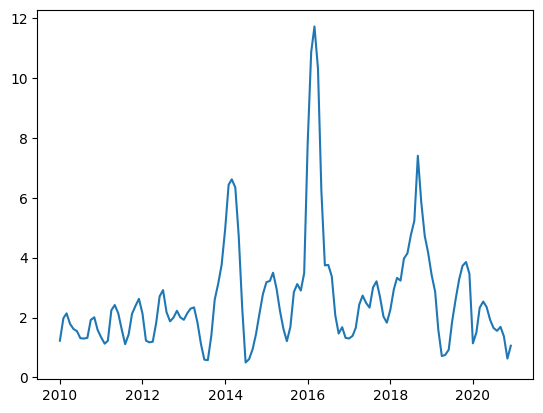

In [281]:
plt.plot(df['RBER_AR_sd6'])

b)

RBER_AR es I(0) con tendencia determinista, mientras que RBER_AR_sd6 es I(0).

In [282]:
from statsmodels.tsa.stattools import adfuller

In [283]:
# Con regression='ct'rechazo (evidencia de estacionariedad), así que le saco la tendencia

y = df['RBER_AR'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])

-3.7043618301512495 0.022071616204801303


In [284]:
# from statsmodels.tsa.stattools import kpss
# import statsmodels.api as sm

# def detrend_con_intercepto(y: pd.Series) -> pd.Series:
#     """
#     Quita tendencia lineal reteniendo el nivel: y - b1*t.
#     Retorna una serie alineada al índice original.
#     """
#     if not isinstance(y, pd.Series):
#         raise TypeError('y debe ser una pandas Series')
#     df = y.to_frame('y').copy()
#     df['t'] = np.arange(len(df), dtype=float)
#     mask = df['y'].notna()
#     t = df.loc[mask, 't'].to_numpy()
#     yy = df.loc[mask, 'y'].to_numpy()
#     if t.size < 2:
#         return y.copy()
#     t_mean, y_mean = t.mean(), yy.mean()
#     b1 = ((t - t_mean) * (yy - y_mean)).sum() / ((t - t_mean) ** 2).sum()
#     out = df['y'] - b1 * df['t']
#     out.index = y.index
#     out.name = (y.name + '_detrended') if y.name else 'detrended'
#     return out

# def clasificar_integracion(y: pd.Series, alpha: float = 0.05, autolag: str = 'AIC'):
#     """
#     Identifica si la serie es:
#       - I(0) alrededor de constante
#       - I(0) con tendencia determinística
#       - I(1) (diferencia de orden 1 estacionaria)
#       - Indeterminado si nada de lo anterior
#     Criterio base:
#       1) ADF en niveles con constante y tendencia (regression='ct').
#       2) Significancia de la tendencia via OLS y ~ const + t.
#       3) ADF en primeras diferencias con constante (regression='c').
#       4) KPSS en niveles para corroborar (regression='c' y 'ct').
#     Retorna dict con etiqueta, resultados y transformaciones útiles.
#     """
#     if not isinstance(y, pd.Series):
#         raise TypeError('y debe ser una pandas Series')
#     y = y.dropna()
#     if y.size < 10:
#         raise ValueError('Se requieren al menos 10 observaciones no nulas')

#     # 1) ADF en niveles con c+t
#     adf_ct = adfuller(y.values, regression='ct', autolag=autolag)
#     adf_ct_res = {
#         'stat': adf_ct[0], 'pvalue': adf_ct[1],
#         'usedlag': adf_ct[2], 'nobs': adf_ct[3],
#         'crit': adf_ct[4]
#     }

#     # 2) Significancia de tendencia via OLS
#     t = np.arange(len(y), dtype=float)
#     X = sm.add_constant(t)
#     ols = sm.OLS(y.values, X, missing='drop').fit()
#     trend_p = ols.pvalues[1] if len(ols.pvalues) > 1 else np.nan
#     trend_b1 = ols.params[1] if len(ols.params) > 1 else np.nan

#     # 3) ADF en primeras diferencias con constante
#     dy = y.diff().dropna()
#     adf_diff_c = adfuller(dy.values, regression='c', autolag=autolag)
#     adf_diff_c_res = {
#         'stat': adf_diff_c[0], 'pvalue': adf_diff_c[1],
#         'usedlag': adf_diff_c[2], 'nobs': adf_diff_c[3],
#         'crit': adf_diff_c[4]
#     }


#     # Clasificación
#     label = ''
#     detrended = None
#     differenced = None

#     if adf_ct_res['pvalue'] < alpha:
#         # Rechaza raíz unitaria en niveles con tendencia incluida
#         if np.isfinite(trend_p) and trend_p < alpha:
#             label = 'I(0) con tendencia determinística (trend stationary)'
#             detrended = detrend_con_intercepto(y)
#         else:
#             label = 'I(0) alrededor de constante'
#     else:
#         # No rechaza raíz unitaria en niveles
#         if adf_diff_c_res['pvalue'] < alpha:
#             label = 'I(1) (la primera diferencia es I(0))'
#             differenced = dy
#             differenced.name = (y.name + '_diff') if y.name else 'diff'
#         else:
#             label = 'Indeterminado o I(d>1); revisar transformaciones adicionales'

#     return {
#         'label': label,
#         'adf_levels_ct': adf_ct_res,
#         'trend_ols': {
#             'beta1': trend_b1,
#             'pvalue_beta1': trend_p,
#             'r2': ols.rsquared
#         },
#         'adf_diff_c': adf_diff_c_res,
#         'transforms': {
#             'detrended': detrended,
#             'differenced': differenced
#         }
#     }

# # Ejemplo de uso:
# res = clasificar_integracion(df['RBER_AR'])
# print(res['label'])
# res

In [285]:
# Agrego un t
df['index'] = list(range(len(df)))

In [286]:
# Calculo beta1 -> me da significativo, lo cual confirma la tendencia deterministica
import statsmodels.api as sm

df_reg = df[['RBER_AR', 'index']].dropna()
X = df_reg[['index']]
y = df_reg['RBER_AR']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                RBER_AR   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     857.7
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           4.27e-59
Time:                        21:27:08   Log-Likelihood:                -421.62
No. Observations:                 132   AIC:                             847.2
Df Residuals:                     130   BIC:                             853.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.5714      1.029    101.593      0.0

In [287]:
# Resto tendencia determinista
beta1 = -0.3978
df['RBER_AR_detrended'] = df['RBER_AR'] - (model.params['index'] * df['index'])

-3.717333407835433 0.003875845856246455


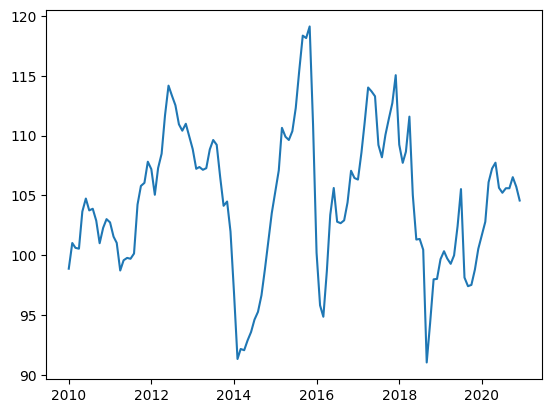

In [288]:
# Rechazo! Es I(0) con tendencia determinista
y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['RBER_AR_detrended'])

In [289]:
# Rechazo, es I(0)

y = df['RBER_AR_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])  # estadístico, p-valor

-3.717333407835433 0.003875845856246455


c)
RBER_AR_detrended causa en el sentio de Granger a RBER_AR_sd6

2. Hacemos un ajuste inicial sin especificar maxlags y elejimos un maxlags apropiado con Selection Order Criteria.

In [290]:
from statsmodels.tsa.api import VAR

model = VAR(df[["RBER_AR_detrended", "RBER_AR_sd6"]].dropna())

# Según todos los criterios, maxlags=2
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        4.823       4.870       124.4       4.842
1        1.591       1.731       4.908       1.648
2      0.9621*      1.196*      2.617*      1.057*
3       0.9676       1.295       2.632       1.100
4        1.011       1.431       2.750       1.182
5        1.071       1.585       2.922       1.280
6        1.056       1.663       2.879       1.302
7        1.007       1.708       2.745       1.291
8        1.039       1.834       2.839       1.362
9        1.024       1.911       2.799       1.384
10       1.054       2.035       2.891       1.452
11       1.085       2.160       2.990       1.522
12       1.015       2.183       2.796       1.490
13       1.065       2.326       2.947       1.577
--------------------------------------------------


/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


3. Hacemos un guess

## Ecuación 1: RBER_AR_detrended.
* Efectos propios (AR terms):
* L1 positivo y fuerte (1.25, muy significativo, p<0.001).
* L2 negativo (-0.39, muy significativo, p<0.001).
* Efectos cruzados: coeficientes muy pequeños y no significativos

## Ecuación 2: RBER_AR_sd6
* Efectos propios (sd6):
* L1: 1.33, muy significativo.
* L2: −0.52, muy significativo.

* Efectos cruzados
* L1: -0.064, significativo (p=0.019)
* L2: 0.082, significativo (p=0.002)

In [296]:
selected_lag = 6
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 27, Aug, 2025
Time:                     21:27:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.54103
Nobs:                     126.000    HQIC:                   1.19354
Log likelihood:          -391.786    FPE:                    2.60450
AIC:                     0.955767    Det(Omega_mle):         2.14011
--------------------------------------------------------------------
Results for equation RBER_AR_detrended
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       12.657461         5.098982            2.482           0.013
L1.RBER_AR_detrended         1.263597         0.104631           12.077           0.000
L1.RBER_AR_sd6      

5. Satisfecho con el guess, evalúo la estabilidad del modelo (que no haya raices unitarias ni residuos autocorrelacionados)

In [298]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(6) es estable: True.
Raíces del VAR(6):


array([ 1.62639824+0.8352318j ,  1.62639824-0.8352318j ,
       -1.79488473-0.j        , -1.17140782+1.0751511j ,
       -1.17140782-1.0751511j , -0.13734092+1.49709155j,
       -0.13734092-1.49709155j,  0.62006968+1.08403619j,
        0.62006968-1.08403619j,  1.10505238+0.36288518j,
        1.10505238-0.36288518j,  1.15832943-0.j        ])

[1.82832803 1.82832803 1.79488473 1.59001452 1.59001452 1.50337807
 1.50337807 1.24884782 1.24884782 1.16311066 1.16311066 1.15832943]
El modelo VAR(6) es estable.


In [299]:
# H_0: residual autocorrelation up to lag x is zero
wb = result_var.test_whiteness(nlags=12)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: reject at 5% significance level. Test statistic: 38.497, critical value: 36.415>, p-value: 0.031>


In [300]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos no estan correlacionados :)
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 17 is zero: fail to reject at 5% significance level. Test statistic: 53.305, critical value: 60.481>, p-value: 0.159>


In [301]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).


# Rechazamos H0: RBER_AR_detrended causa en el sentio de Granger a RBER_AR_sd6!

print(result_var.test_causality("RBER_AR_detrended", ["RBER_AR_sd6"], kind="f"))
print(result_var.test_causality("RBER_AR_sd6", ["RBER_AR_detrended"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_sd6 does not Granger-cause RBER_AR_detrended: fail to reject at 5% significance level. Test statistic: 0.324, critical value: 2.139>, p-value: 0.924>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: RBER_AR_detrended does not Granger-cause RBER_AR_sd6: reject at 5% significance level. Test statistic: 3.397, critical value: 2.139>, p-value: 0.003>


# 3.

Polinomio: a*x^2 + b*x + c

Ambas raices son >1 en módulo, por lo que es estacionario.

In [252]:
# Reales
import math, cmath

def raices_cuadratica(a,b,c):
    D = b*b - 4*a*c
    if D >= 0:
        sqrtD = math.sqrt(D)
    else:
        sqrtD = cmath.sqrt(D)
    return (-b + sqrtD)/(2*a), (-b - sqrtD)/(2*a)

print(raices_cuadratica(.18, -1.1, 1))

(5.000000000000001, 1.111111111111111)


In [253]:
# Imaginarios
import cmath

def raices_cuadratica(a, b, c):
    """
    Resuelve ax^2 + bx + c = 0 usando la resolvente.
    Devuelve (x1, x2). Soporta raíces complejas.
    """
    if a == 0:
        if b == 0:
            raise ValueError("a=b=0: no hay ecuación.")
        return (-c / b,)

    D = b*b - 4*a*c
    sqrtD = cmath.sqrt(D)
    x1 = (-b + sqrtD) / (2*a)
    x2 = (-b - sqrtD) / (2*a)
    return x1, x2

# Ejemplo:
print(raices_cuadratica(.18, -1.1, 1))

((5.000000000000001+0j), (1.111111111111111+0j))


# 4. 

In [254]:
df = pd.read_excel("../../Clase 7/Precios_y_Dinero.xlsx").rename({'M ': 'M'}, axis=1)
df.head()

,MMYY,IPC,M,M_en_ARS
0,2003-01-01,100.000000,100.000000,29609.920333
1,2003-02-01,100.566796,99.359830,29420.366429
2,2003-03-01,101.155116,102.628052,30388.084290
3,2003-04-01,101.212513,104.258927,30870.985333
4,2003-05-01,100.817908,111.804321,33105.170323


In [255]:
# Trabajo con inflación y crecimiento monetario
df['inflacion'] = (df['IPC'] - df['IPC'].shift(1)) / df['IPC'].shift(1) * 100
df['crec_m'] = (df['M'] - df['M'].shift(1)) / df['M'].shift(1) * 100

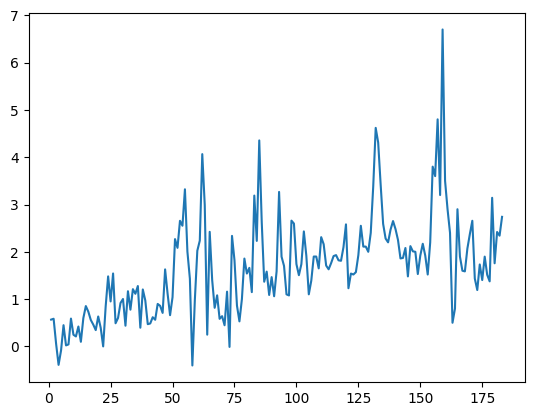

In [256]:
plt.plot(df['inflacion'])

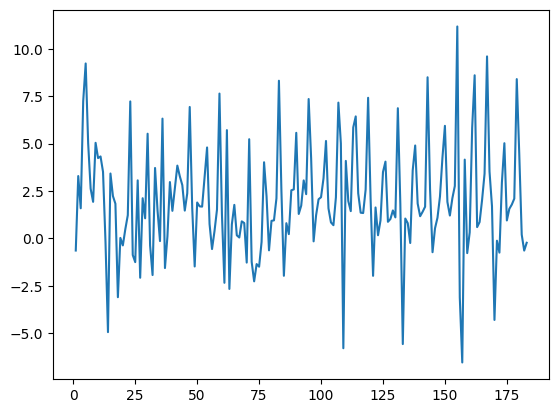

In [257]:
plt.plot(df['crec_m'])

In [258]:
# Rechazo H0: la serie es estacionaria

y = df['crec_m'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])

-3.67201257822809 0.02426772381487318


In [259]:
# Con regression='ct'rechazo (evidencia de estacionariedad), así que le saco la tendencia

y = df['inflacion'].dropna()
adf = adfuller(y, regression='ct', autolag='AIC')  # autolag='t-stat' sería NG-Perron
print(adf[0], adf[1])

-7.720398146539171 3.163671660812864e-10


In [260]:
# Agrego un t
df['index'] = list(range(len(df)))

# Calculo beta1 -> me da significativo, lo cual confirma la tendencia deterministica
import statsmodels.api as sm

df_reg = df[['inflacion', 'index']].dropna()
X = df_reg[['index']]
y = df_reg['inflacion']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflacion   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     96.16
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           1.78e-18
Time:                        21:20:03   Log-Likelihood:                -229.94
No. Observations:                 183   AIC:                             463.9
Df Residuals:                     181   BIC:                             470.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5763      0.127      4.541      0.0

In [261]:
# Resto tendencia determinista
df['inflacion_detrended'] = df['inflacion'] - (model.params['index'] * df['index'])

-7.741933072685119 1.056277852252593e-11


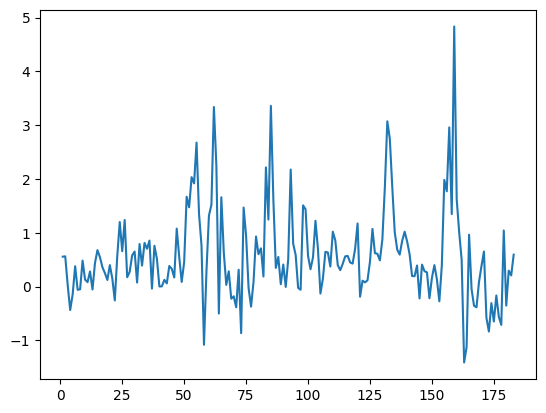

In [262]:
# Rechazo! Es I(0) con tendencia determinista
y = df['inflacion_detrended'].dropna()
adf = adfuller(y, regression='c', autolag='AIC')
print(adf[0], adf[1])

plt.plot(df['inflacion_detrended'])

In [263]:
from statsmodels.tsa.api import VAR

model = VAR(df[["inflacion_detrended", "crec_m"]].dropna())

# AIC=13
print(model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.849       1.886       6.353       1.864
1        1.555      1.667*       4.737       1.601
2        1.519       1.704       4.568      1.594*
3        1.510       1.769       4.528       1.615
4        1.516       1.850       4.556       1.652
5        1.534       1.942       4.640       1.700
6        1.528       2.010       4.613       1.724
7        1.504       2.059       4.502       1.729
8        1.528       2.158       4.615       1.784
9        1.558       2.262       4.760       1.844
10       1.483       2.261       4.417       1.798
11       1.454       2.306       4.293       1.799
12       1.346       2.272       3.858       1.722
13      1.337*       2.337      3.828*       1.743
14       1.370       2.444       3.961       1.806
--------------------------------------------------


/opt/homebrew/Caskroom/miniforge/base/envs/env-udesa/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [264]:
selected_lag = 13
result_var = model.fit(selected_lag)
print(result_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 27, Aug, 2025
Time:                     21:20:03
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.35573
Nobs:                     170.000    HQIC:                   1.76385
Log likelihood:          -544.009    FPE:                    3.91601
AIC:                      1.35965    Det(Omega_mle):         2.91614
--------------------------------------------------------------------
Results for equation inflacion_detrended
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.373864         0.198183            1.886           0.059
L1.inflacion_detrended          0.443425         0.083319            5.322           0.000
L1.cre

In [265]:
print(f"El modelo VAR({selected_lag}) es estable: {result_var.is_stable()}.")

roots = result_var.roots
print(f"Raíces del VAR({selected_lag}):")
display(roots)

print(np.abs(result_var.roots))

if np.any(np.abs(roots) < 1):
    print(f"El modelo VAR({selected_lag}) NO es estable.")
else:
    print(f"El modelo VAR({selected_lag}) es estable.")

El modelo VAR(13) es estable: True.
Raíces del VAR(13):


array([ 0.93728996+2.4346696j ,  0.93728996-2.4346696j ,
       -0.53144672+1.15689344j, -0.53144672-1.15689344j,
       -0.80047759+0.83900974j, -0.80047759-0.83900974j,
       -1.12492543-0.j        , -1.08229038+0.3019519j ,
       -1.08229038-0.3019519j ,  1.1125361 -0.j        ,
        0.80082318+0.77086512j,  0.80082318-0.77086512j,
        0.28734829+1.072839j  ,  0.28734829-1.072839j  ,
       -0.93802938-0.56298667j, -0.93802938+0.56298667j,
        1.04932422+0.23431783j,  1.04932422-0.23431783j,
        0.95705029+0.47267139j,  0.95705029-0.47267139j,
       -0.05731702-1.05752915j, -0.05731702+1.05752915j,
       -0.51933044-0.9132598j , -0.51933044+0.9132598j ,
        0.51631307-0.87493434j,  0.51631307+0.87493434j])

[2.60885578 2.60885578 1.27312138 1.27312138 1.15961274 1.15961274
 1.12492543 1.12362245 1.12362245 1.1125361  1.11155333 1.11155333
 1.11065411 1.11065411 1.09400782 1.09400782 1.07516797 1.07516797
 1.06740971 1.06740971 1.05908127 1.05908127 1.05059392 1.05059392
 1.01591795 1.01591795]
El modelo VAR(13) es estable.


In [267]:
# H_0: residual autocorrelation up to lag x is zero
# NO rechazamos H0: los residuos estan correlacionados :(
p = result_var.k_ar
T = result_var.nobs

nlags = int(min(p + np.sqrt(T), T//5))
wb = result_var.test_whiteness(nlags=nlags)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 26 is zero: reject at 5% significance level. Test statistic: 70.931, critical value: 69.832>, p-value: 0.042>


In [268]:
#### Testeo por Causalidad en Sentido de Granger
# Ejemplo: infl causa en el sentio de Granger a crec_m?
# Paso 1: ajusta una regresión de crec_m en p rezagos de infl.
# Paso 2: hace un test-f (todos los betas son 0).


# Rechazamos H0: inflacion_detrended causa en el sentio de Granger a crec_m!

print(result_var.test_causality("inflacion_detrended", ["crec_m"], kind="f"))
print(result_var.test_causality("crec_m", ["inflacion_detrended"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause inflacion_detrended: fail to reject at 5% significance level. Test statistic: 1.710, critical value: 1.754>, p-value: 0.058>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: inflacion_detrended does not Granger-cause crec_m: fail to reject at 5% significance level. Test statistic: 1.692, critical value: 1.754>, p-value: 0.062>
